Epoch 0, Loss: 1.0862, Accuracy: 0.3333
Epoch 200, Loss: 0.1297, Accuracy: 1.0000
Epoch 400, Loss: 0.0337, Accuracy: 1.0000
Epoch 600, Loss: 0.0178, Accuracy: 1.0000
Epoch 800, Loss: 0.0119, Accuracy: 1.0000
Epoch 1000, Loss: 0.0088, Accuracy: 1.0000
Epoch 1200, Loss: 0.0069, Accuracy: 1.0000
Epoch 1400, Loss: 0.0057, Accuracy: 1.0000
Epoch 1600, Loss: 0.0048, Accuracy: 1.0000
Epoch 1800, Loss: 0.0042, Accuracy: 1.0000


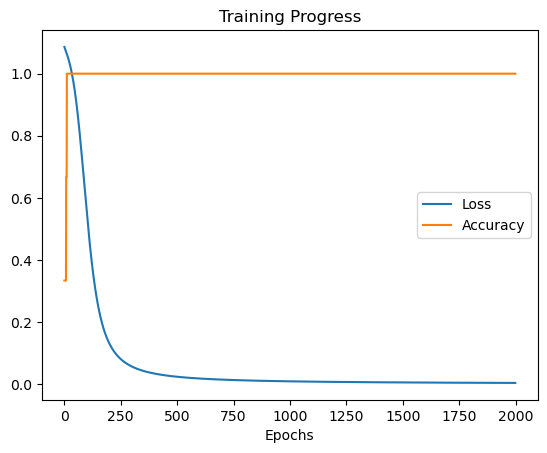

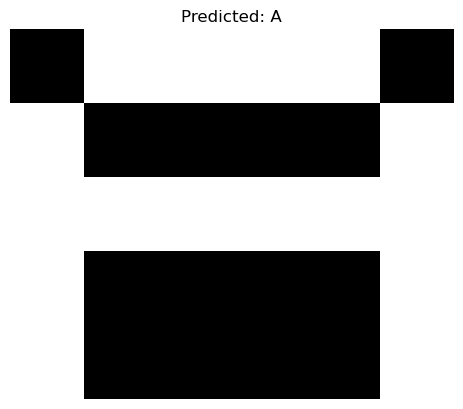

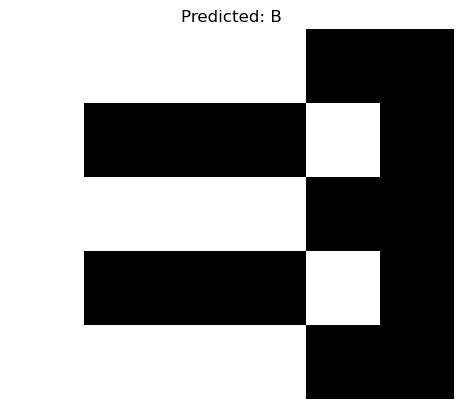

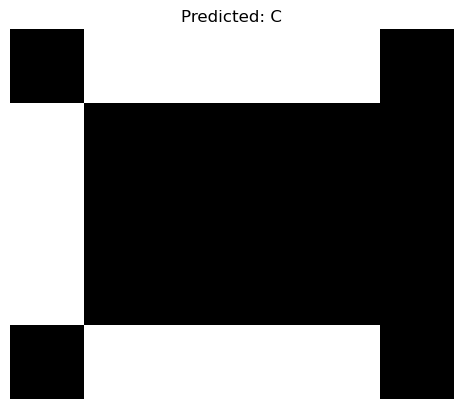

In [36]:
import numpy as np
import matplotlib.pyplot as plt 

# Define the base pattern 
def create_patterns():
    A = np.array([
        0,1,1,1,1,0,
        1,0,0,0,0,1,
        1,1,1,1,1,1,
        1,0,0,0,0,1,
        1,0,0,0,0,1
    ])
    B = np.array([
        1,1,1,1,0,0,
        1,0,0,0,1,0,
        1,1,1,1,0,0,
        1,0,0,0,1,0,
        1,1,1,1,0,0
    ])
    C= np.array([
        0,1,1,1,1,0,
        1,0,0,0,0,0,
        1,0,0,0,0,0,
        1,0,0,0,0,0,
        0,1,1,1,1,0
    ])
    labels = np.array([
        [1, 0, 0],  # A
        [0, 1, 0],  # B
        [0, 0, 1]   # C
    ])
    return np.array([A,B,C]), labels

# add noise and Expand dataset
def add_noise(patterns, labels,noise_level=0.1, copies=100):
    X,y = [], []

    for i in range(len(patterns)):
        for _ in range(copies):
            noisy = patterns[i].copy()
            noise = np.random.rand(30)
            noise = np.abs(noisy - noise.astype(int))
            X.append(noisy)
            y.append(labels[i])
    return np.array(X), np.array(y)

# Activation Function
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def sigmoid_derivative(x):
    return x*(1 -x)
def softmax(x):
    exps = np.exp(x -np.max(x,axis=1,keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)


#initialize Weights
def initialize_weight(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) *0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    b2 = np.zeros((1, output_size))
    return W1,b1,W2,b2

#Forward and Backward Function
def forward(X,W1,b1,W2,b2):
    Z1 = np.dot(X,W1) +b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1,W2) + b2
    A2 = softmax(Z2)
    return A1,A2

def backward(X,y,A1,A2,W2):
    m=len(X)
    dZ2 = A2 - y
    dW2 = np.dot(A1.T,dZ2) /m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2
    
def train(X, y, epochs=2000, lr=0.1):
    input_size = 30
    hidden_size = 16
    output_size = 3

    W1, b1, W2, b2 = initialize_weight(input_size, hidden_size, output_size)
    losses, accuracies = [], []

    for epoch in range(epochs):
        A1, A2 = forward(X, W1, b1, W2, b2)

        loss = -np.mean(np.sum(y * np.log(A2 + 1e-8), axis=1))
        acc = np.mean(np.argmax(A2, axis=1) == np.argmax(y, axis=1))

        dW1, db1, dW2, db2 = backward(X, y, A1, A2, W2)

        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

        losses.append(loss)
        accuracies.append(acc)

        if epoch % 200 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

    return W1, b1, W2, b2, losses, accuracies

def plot_training(accuracies,losses):
    plt.plot(losses, label="Loss")
    plt.plot(accuracies, label="Accuracy")
    plt.xlabel("Epochs")
    plt.title("Training Progress")
    plt.legend()
    plt.show()


patterns, labels = create_patterns()
X_train, y_train = add_noise(patterns, labels, noise_level=0.1, copies=100)

W1, b1, W2, b2, losses, accuracies = train(X_train, y_train, epochs=2000, lr=0.1)
plot_training(accuracies,losses)

# Test a clean pattern
test_image(patterns[0], W1, b1, W2, b2 )  # Should predict 'A'
test_image(patterns[1], W1, b1, W2, b2 ) 
test_image(patterns[2], W1, b1, W2, b2 ) 
